<a href="https://colab.research.google.com/github/phurisk/BSC_DPDM23/blob/main/Internet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect drive

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Dict

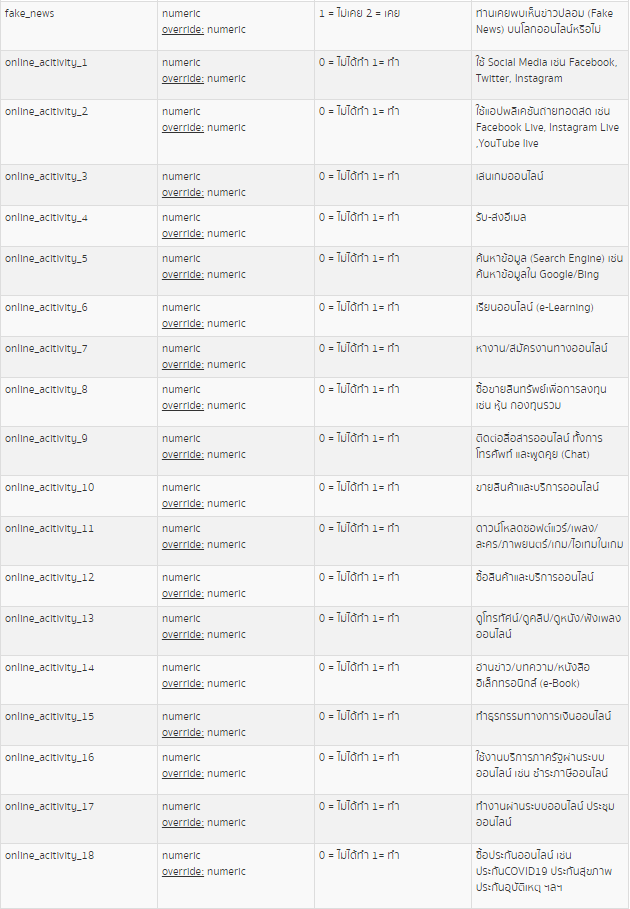

#Read Data

In [103]:
import pandas as pd

df = pd.read_excel('/content/drive/Shareddrives/Internet Behavior/raw-data-iub-2563.xlsx')

df


,fake_news,online_acitivity_1,online_acitivity_2,online_acitivity_3,online_acitivity_4,online_acitivity_5,online_acitivity_6,online_acitivity_7,online_acitivity_8,online_acitivity_9,online_acitivity_10,online_acitivity_11,online_acitivity_12,online_acitivity_13,online_acitivity_14,online_acitivity_15,online_acitivity_16,online_acitivity_17,online_acitivity_18
0,2,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,0,0
1,2,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0
2,2,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0
3,2,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,0
4,2,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21644,2,1,1,0,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1
21645,2,1,0,0,1,1,0,1,0,1,0,1,1,1,1,1,0,0,0
21646,2,1,0,1,0,1,1,0,0,1,0,0,1,1,1,1,0,0,0
21647,2,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,0


In [104]:
count_fake_news_encounters = df[df['fake_news'] == 1].shape[0]
count_fake_news_encounters

1151

# ตรวจสอบค่า Null หรือค่าผิดปกติ ใน DataFrame

- ตรวจสอบค่าใน column fake_news ว่าเป็นค่า 1 และ  2 หรือไม่

In [105]:
# Check fake_news column
valid_fake_news = all(df['fake_news'].isin([1, 2]))
valid_fake_news

True

- ตรวจสอบค่าใน column online_acitivity ทั้งหมด ว่าเป็นค่า 0 และ  1 หรือไม่

In [106]:
# เลือกคอลัมน์ที่ 2 ถึงคอลัมน์สุดท้าย
activity_columns = df.iloc[:, 1:]

# ตรวจสอบว่าค่าทั้งหมดเป็น 0 หรือ 1
valid_values = (activity_columns.isin([0, 1])).all().all()

valid_values


False

- ตรวจสอบค่าที่ไม่ใช่ตัวเลขในข้อมูล

In [107]:
non_numeric_values = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum()

print(non_numeric_values)

fake_news              0
online_acitivity_1     0
online_acitivity_2     0
online_acitivity_3     0
online_acitivity_4     0
online_acitivity_5     0
online_acitivity_6     0
online_acitivity_7     0
online_acitivity_8     0
online_acitivity_9     0
online_acitivity_10    0
online_acitivity_11    0
online_acitivity_12    0
online_acitivity_13    0
online_acitivity_14    0
online_acitivity_15    0
online_acitivity_16    0
online_acitivity_17    0
online_acitivity_18    1
dtype: int64


- แสดง row ที่มีข้อมูลที่ไม่ใช่ตัวเลข

In [108]:
non_numeric_rows = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().any(axis=1)
non_numeric_rows_df = df[non_numeric_rows]
non_numeric_rows_df

,fake_news,online_acitivity_1,online_acitivity_2,online_acitivity_3,online_acitivity_4,online_acitivity_5,online_acitivity_6,online_acitivity_7,online_acitivity_8,online_acitivity_9,online_acitivity_10,online_acitivity_11,online_acitivity_12,online_acitivity_13,online_acitivity_14,online_acitivity_15,online_acitivity_16,online_acitivity_17,online_acitivity_18
56,2,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,1,0,S


- ลบ row ไม่ใช่ตัวเลข (เนื่องจากมีข้อมูลที่ผิดปกติไม่เกิน 5% ของข้อมูลทั้งหมด)

In [109]:
non_numeric_rows = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().any(axis=1)
numeric_df = df[~non_numeric_rows]
numeric_df

,fake_news,online_acitivity_1,online_acitivity_2,online_acitivity_3,online_acitivity_4,online_acitivity_5,online_acitivity_6,online_acitivity_7,online_acitivity_8,online_acitivity_9,online_acitivity_10,online_acitivity_11,online_acitivity_12,online_acitivity_13,online_acitivity_14,online_acitivity_15,online_acitivity_16,online_acitivity_17,online_acitivity_18
0,2,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,0,0
1,2,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0
2,2,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0
3,2,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,0
4,2,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21644,2,1,1,0,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1
21645,2,1,0,0,1,1,0,1,0,1,0,1,1,1,1,1,0,0,0
21646,2,1,0,1,0,1,1,0,0,1,0,0,1,1,1,1,0,0,0
21647,2,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,0


- ตรวจสอบค่าผิดปกติอีกครั้ง

In [110]:
non_numeric_values = numeric_df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum()

print(non_numeric_values)

fake_news              0
online_acitivity_1     0
online_acitivity_2     0
online_acitivity_3     0
online_acitivity_4     0
online_acitivity_5     0
online_acitivity_6     0
online_acitivity_7     0
online_acitivity_8     0
online_acitivity_9     0
online_acitivity_10    0
online_acitivity_11    0
online_acitivity_12    0
online_acitivity_13    0
online_acitivity_14    0
online_acitivity_15    0
online_acitivity_16    0
online_acitivity_17    0
online_acitivity_18    0
dtype: int64


- หาค่า missing value จากข้อมูลทั้งหมด

In [111]:
null_values = numeric_df.isnull().sum()

print(null_values)

fake_news              0
online_acitivity_1     0
online_acitivity_2     0
online_acitivity_3     0
online_acitivity_4     0
online_acitivity_5     0
online_acitivity_6     0
online_acitivity_7     0
online_acitivity_8     0
online_acitivity_9     0
online_acitivity_10    0
online_acitivity_11    0
online_acitivity_12    0
online_acitivity_13    0
online_acitivity_14    0
online_acitivity_15    0
online_acitivity_16    0
online_acitivity_17    0
online_acitivity_18    0
dtype: int64


# กำหนด Features และ Target varible (X,y)

In [112]:
data = numeric_df.copy()

In [135]:
# Features (X)
X = data.drop(columns=['fake_news'])  # คอลัมน์กิจกรรมออนไลน์ทั้งหมด

# Target variable (y)
y = data['fake_news']  # เลือกคอลัมน์ 'fake_news' เป็นตัวแปรเป้าหมาย


# Method 1: Threshold Adjustment

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model (using DecisionTreeClassifier as an example)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities on test data
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Adjust threshold (example threshold = 0.5)
threshold = 0.5

# Convert probabilities to binary predictions based on the adjusted threshold
y_pred = (y_pred_proba >= threshold).astype(int)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.048267898383371824
Precision: [0.         0.04917647 0.        ]
Recall: [0.         0.98122066 0.        ]
F1 Score: [0.         0.09365897 0.        ]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


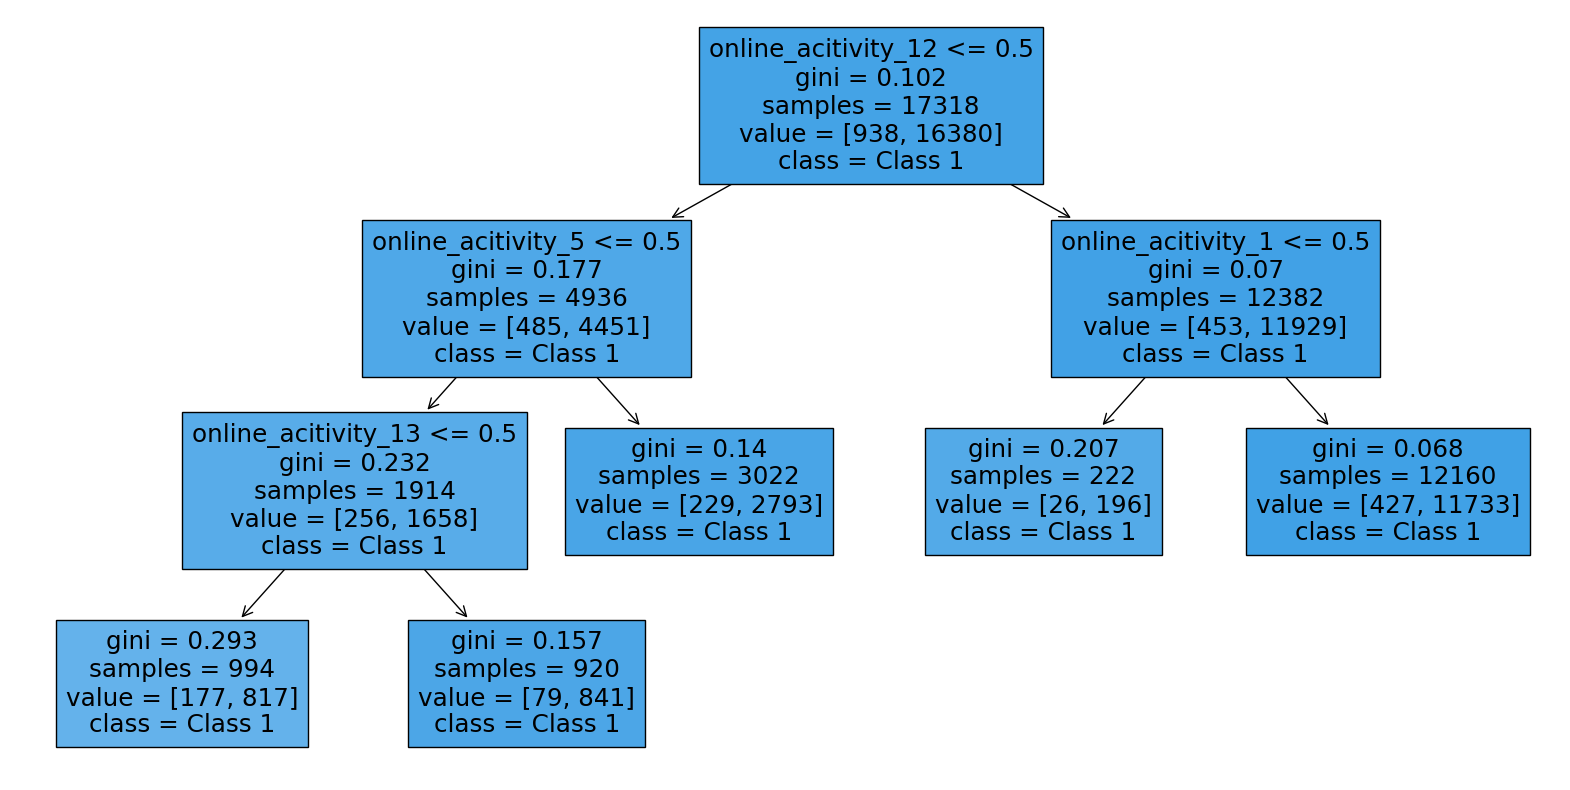

In [138]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Train your model with max_depth and max_leaf_nodes parameters
clf = DecisionTreeClassifier(random_state=42, max_depth=3, max_leaf_nodes=5)
clf.fit(X_train, y_train)

# Plot the decision tree with reduced depth
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"])
plt.show()


# SMOTE

In [154]:
from imblearn.over_sampling import SMOTE

# สร้างอินสแตนซ์ของ SMOTE
smote = SMOTE()

# ใช้ SMOTE ในการปรับข้อมูล
X_resampled, y_resampled = smote.fit_resample(X, y)


In [155]:
# ตัดแบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ (เซ็ตเทรนและเซ็ตทดสอบ)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# สร้างแบบจำลองและฝึกแบบจำลองโดยใช้ข้อมูลที่ถูกปรับขึ้น (oversampled)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [156]:

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8320526893523601
Precision: [0.79571304 0.87786049]
Recall: [0.89144817 0.77319087]
F1 Score: [0.84086444 0.82220788]


# Method 2: Undersampling

In [38]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

# Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)


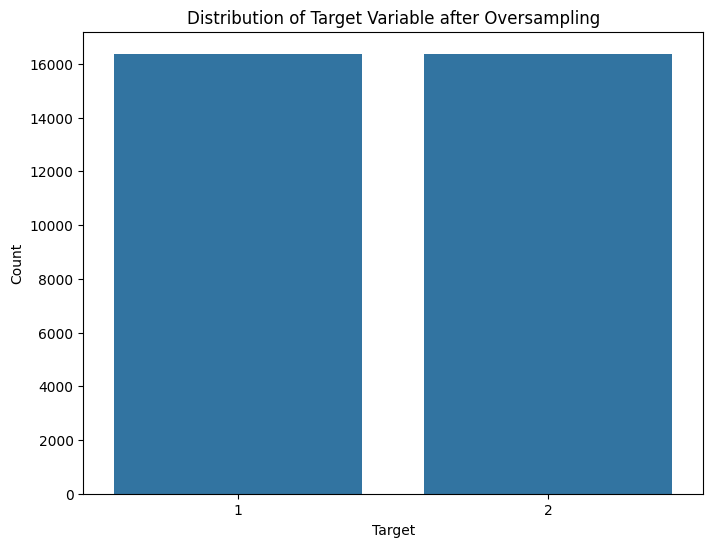

In [147]:
# Combine the oversampled features and target variable into a DataFrame
df_over = pd.concat([X_train_over, pd.Series(y_train_over, name='target')], axis=1)

# Plot the distribution of the target variable after oversampling
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df_over)
plt.title('Distribution of Target Variable after Oversampling')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


In [150]:

clf.fit(X_train_over, y_train_over)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7725173210161663
Precision: [0.09453782 0.96358792]
Recall: [0.42253521 0.79062424]
F1 Score: [0.15450644 0.86857905]


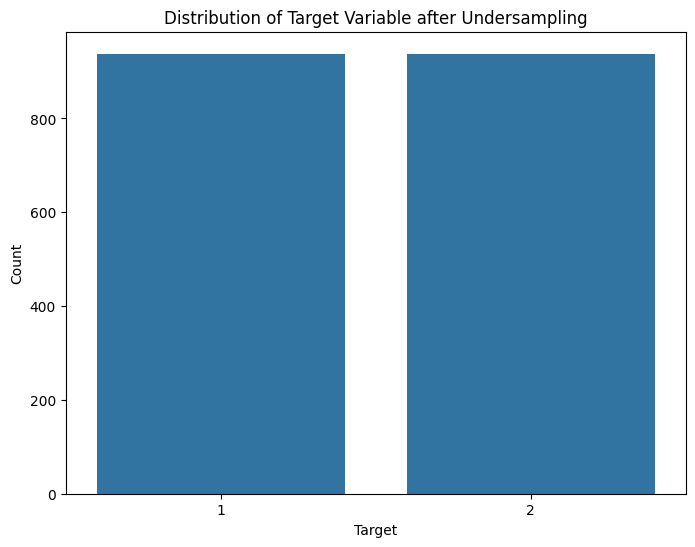

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the undersampled features and target variable into a DataFrame
df_under = pd.concat([X_train_under, pd.Series(y_train_under, name='target')], axis=1)

# Plot the distribution of the target variable after undersampling
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df_under)
plt.title('Distribution of Target Variable after Undersampling')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


In [131]:

clf.fit(X_train_under, y_train_under)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5133949191685913
Precision: [0.06479779 0.96657382]
Recall: [0.66197183 0.50570804]
F1 Score: [0.11804102 0.66400893]


In [40]:
# Display the count of each class after undersampling
class_counts = df_under['target'].value_counts()
print("Class Counts after Undersampling:")
print(class_counts)


Class Counts after Undersampling:
1    938
2    938
Name: target, dtype: int64


# Method 3: Cost-sensitive Learning

In [133]:
# Replace class label '2' with '1' and class label '1' with '0'
y_train_binary = y_train.replace({2: 1, 1: 0})
y_test_binary = y_test.replace({2: 1, 1: 0})

# Define class weights
class_weights = {0: 1, 1: 10}  # You can adjust the class weights based on your preference

# Train your model with the updated target variable
clf = DecisionTreeClassifier(random_state=42, class_weight=class_weights)
clf.fit(X_train, y_train_binary)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_binary, y_pred)
precision = precision_score(y_test_binary, y_pred)
recall = recall_score(y_test_binary, y_pred)
f1 = f1_score(y_test_binary, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9341801385681293
Precision: 0.9508235294117647
Recall: 0.9815399562788438
F1 Score: 0.9659376120473288


# การแบ่งชุดข้อมูล

In [43]:
# แบ่งข้อมูลออกเป็นชุดในการ train และtest (train 80% test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# Print the shapes of the training and test sets
print("Training set shape (X):", X_train.shape)
print("Training set shape (y):", y_train.shape)
print("Test set shape (X):", X_test.shape)
print("Test set shape (y):", y_test.shape)

Training set shape (X): (17318, 18)
Training set shape (y): (17318,)
Test set shape (X): (4330, 18)
Test set shape (y): (4330,)


# Dicition tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
decision_tree.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = decision_tree.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print other classification metrics
print(classification_report(y_test, y_pred))
